In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

data_folder = './data'
meta_data = pd.read_csv(os.path.join(data_folder, "metadata_files/metadata.csv"))

In [8]:
# Load each of the sample data files
discharge_path = './data/csv_files/00001.csv'
impedance_path = './data/csv_files/00002.csv'
charge_path = './data/csv_files/00003.csv'

discharge_data = pd.read_csv(discharge_path)
charge_data = pd.read_csv(charge_path)
impedance_data = pd.read_csv(impedance_path)

# Display the first few rows of each dataset to understand their structure
discharge_data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


In [7]:
charge_data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.486189,0.001417,5.990142,-0.0006,0.002,0.000
1,3.746592,1.489057,5.992528,1.4995,4.618,2.594
2,3.775438,1.490426,5.991340,1.4995,4.669,8.922
3,3.794844,1.491527,6.003554,1.4995,4.694,15.234
4,3.811691,1.491425,6.026729,1.4995,4.707,21.516


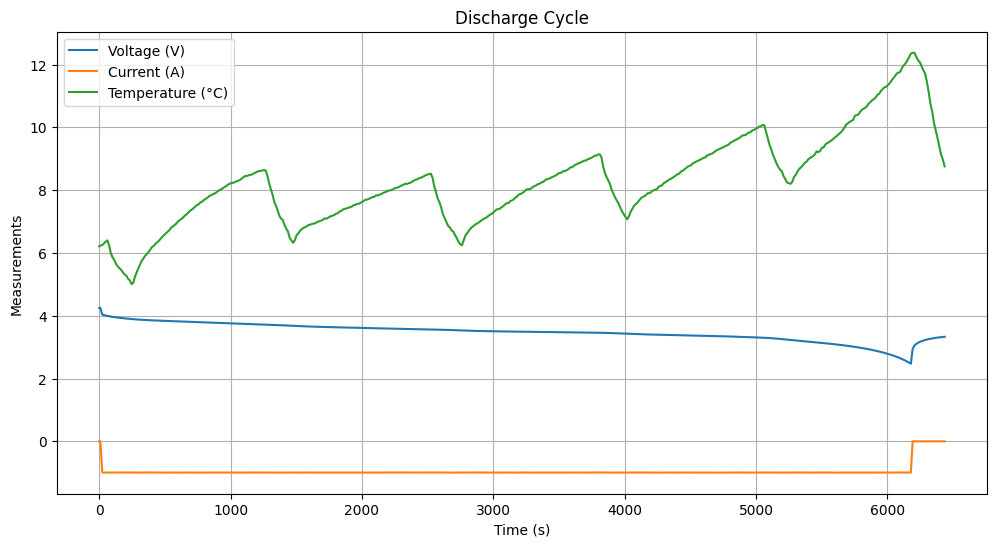

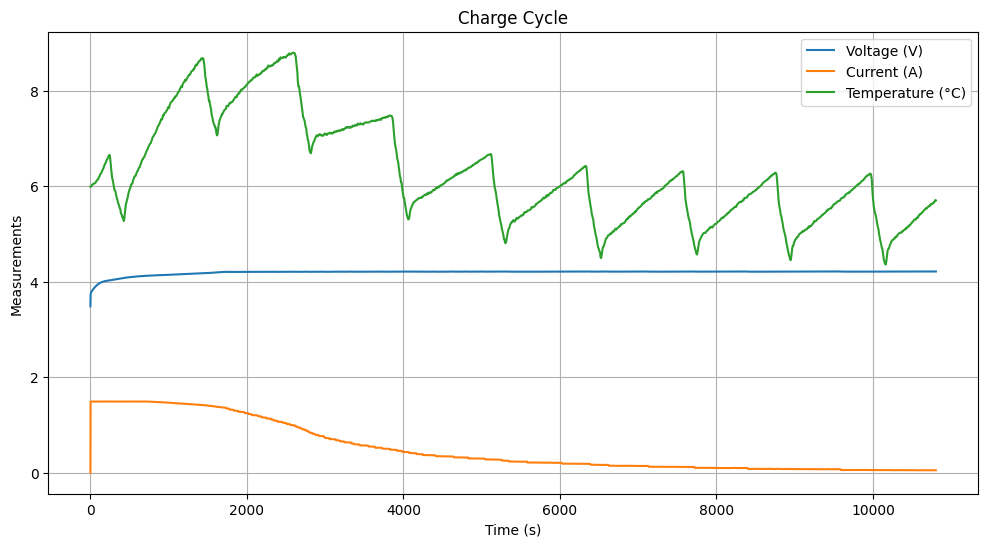

In [5]:
import matplotlib.pyplot as plt

# Plotting function for time series data
def plot_time_series(data, x, ys, title, xlabel, ylabel, legends):
    plt.figure(figsize=(12, 6))
    for y in ys:
        plt.plot(data[x], data[y], label=legends[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Discharge cycle plot
plot_time_series(
    discharge_data,
    "Time",
    ["Voltage_measured", "Current_measured", "Temperature_measured"],
    "Discharge Cycle",
    "Time (s)",
    "Measurements",
    {"Voltage_measured": "Voltage (V)", "Current_measured": "Current (A)", "Temperature_measured": "Temperature (°C)"}
)

# Charge cycle plot
plot_time_series(
    charge_data,
    "Time",
    ["Voltage_measured", "Current_measured", "Temperature_measured"],
    "Charge Cycle",
    "Time (s)",
    "Measurements",
    {"Voltage_measured": "Voltage (V)", "Current_measured": "Current (A)", "Temperature_measured": "Temperature (°C)"}
)

In [6]:
impedance_data.head()

,Sense_current,Battery_current,Current_ratio,Battery_impedance,Rectified_Impedance
0,(928.3472290039062-48.499576568603516j),(228.7861328125-70.94481658935547j),(3.76172584438583+0.9544956717274271j),(0.19021741554080737+0.07913959666077047j),(0.17493022756754967-0.02331644173631698j)
1,(922.0059814453125-52.15481185913086j),(233.29783630371094-67.84492492675781j),(3.70383574337748+0.8535511912426126j),(0.012482111540534805+0.03664975726191017j),(0.16866854345060991-0.024717137242854174j)
2,(920.0405883789062-52.19926452636719j),(236.62075805664062-67.22105407714844j),(3.6558702379340415+0.8179848126025503j),(0.030461237041852884-0.08529386061204824j),(0.16107808875912483-0.024114907529065532j)
3,(914.2005615234375-52.371726989746094j),(242.2973175048828-66.45936584472656j),(3.564190338159781+0.7614698525522733j),(0.14229365598447172-0.12192216177062407j),(0.14924381603096853-0.02372905366581296j)
4,(911.2781372070312-45.477928161621094j),(246.62347412109375-65.4150161743164j),(3.4978434135716947+0.7433743116536402j),(0.24388219819020493-0.08033187245076714j),(0.14049811021506395-0.022851601640846698j)


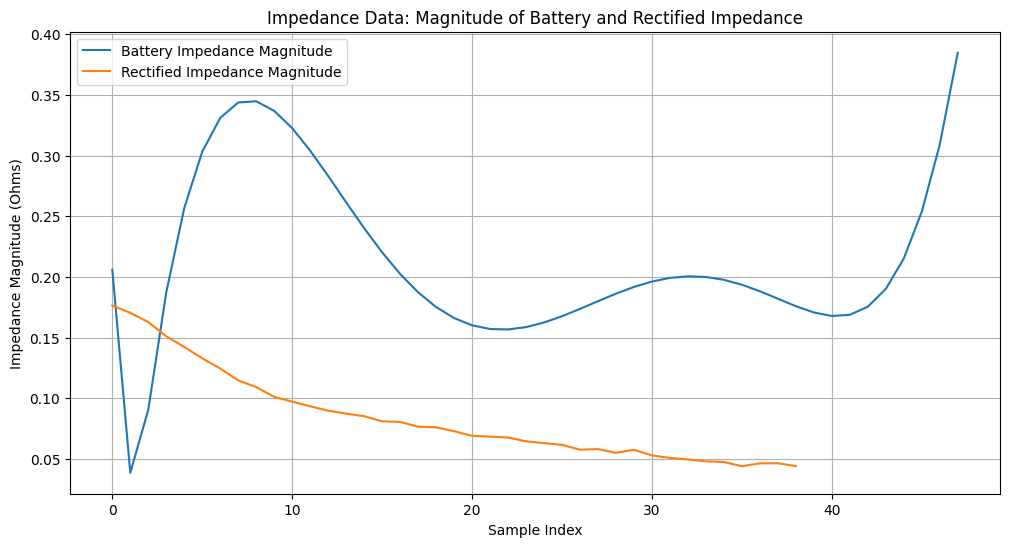

In [10]:
# Correcting the conversion of strings to complex numbers using np.complex_
impedance_data['Battery_impedance'] = impedance_data['Battery_impedance'].apply(lambda x: np.complex_(x))
impedance_data['Rectified_Impedance'] = impedance_data['Rectified_Impedance'].apply(lambda x: np.complex_(x))

# Recalculating the magnitude of the impedance
impedance_data['Battery_impedance_magnitude'] = np.abs(impedance_data['Battery_impedance'])
impedance_data['Rectified_Impedance_magnitude'] = np.abs(impedance_data['Rectified_Impedance'])

# Replotting the magnitudes of the impedances
plt.figure(figsize=(12, 6))
plt.plot(impedance_data['Battery_impedance_magnitude'], label='Battery Impedance Magnitude')
plt.plot(impedance_data['Rectified_Impedance_magnitude'], label='Rectified Impedance Magnitude')
plt.title('Impedance Data: Magnitude of Battery and Rectified Impedance')
plt.xlabel('Sample Index')
plt.ylabel('Impedance Magnitude (Ohms)')
plt.legend()
plt.grid(True)
plt.show()
